<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc.png" alt="Logo UOC" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Modelado de datos. Clustering de aprendizaje no supervisado</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>Trabajo Final de Máster</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Lissette Muñoz Guillen <span style="margin-left: 30px;">Profesor: 
Laia Subirats Maté</span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducción

En esta sección generaremos el modelo sobre los datos limpios extraidos en la sección "Limpieza y análisis de datos estadísticos", siendo este el paso más importante de nuestro estudio. 
Esta sección incluye:
 - Carga de datos pre-procesados
 - Creación del modelo k-means incluye todo su proceso.
 - Normalización de los datos
 - Reducción de dimensionalidad PCA
 - Gráfica de los clusters obtenidos
 - Análisis del modelo generado


Lo primero que haremos será importar todas las librerias necesarias para nuestra modelado, gráficos y análisis.

In [43]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Modelado
# ================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.metrics import silhouette_score, silhouette_samples

# Gráficos
# ================================================

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
import matplotlib.pyplot as plt

# Configuración warnings
# ==================================================
import warnings
warnings.filterwarnings('ignore')

## Carga de datos pre-procesados con las variables objetivo.

In [44]:
data_score = pd.read_csv('../conjunto_datos/df_score.csv', sep=';')
data_score.head(10)

,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
0,2032,1,1,0.00,0.00,0
1,2213,7,3,4.88,4.88,0
2,2215,13,6,7.21,7.21,1
3,2217,8,3,5.60,5.60,0
4,2218,29,15,6.18,6.18,0
5,2219,27,12,5.40,5.40,2
6,2220,19,2,8.06,8.06,4
7,2221,16,2,7.89,7.89,3
8,2222,25,16,8.61,8.61,0
9,2243,15,9,5.83,5.83,0


In [45]:
#Pasamos a un nuevo dataframe las columnas que son de nuestro interes para el análsis, es decir, sin el id del estudiante
dataF=data_score.iloc[:, [1,2,3,4,5]]
dataF.head()

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
0,1,1,0.00,0.00,0
1,7,3,4.88,4.88,0
2,13,6,7.21,7.21,1
3,8,3,5.60,5.60,0
4,29,15,6.18,6.18,0


## Aprendizaje no supervisado k-means

Para nuestro clustering utilizaremos todas las variables del conjunto de datos anterior. Primero estimaremos el número de clusters a detectar por *k-means*.
Una técnica para estimar $k$ es, con técnica del codo, que consiste en una función monótona decreciente, donde intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Con la ayuda de la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*] armaremos nuestro modelo inicial.**

In [46]:
Nc = range(1, 10)
#Hacemos uso de la libreria
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(dataF).score(dataF) for i in range(len(kmeans))]
#Observamos los scores
score


[-46112.099694827586,
 -19158.47498719335,
 -11331.970966308092,
 -7922.454213020591,
 -6603.293523776535,
 -5382.311675995007,
 -4539.212536548069,
 -3823.957090970913,
 -3442.000885797474]

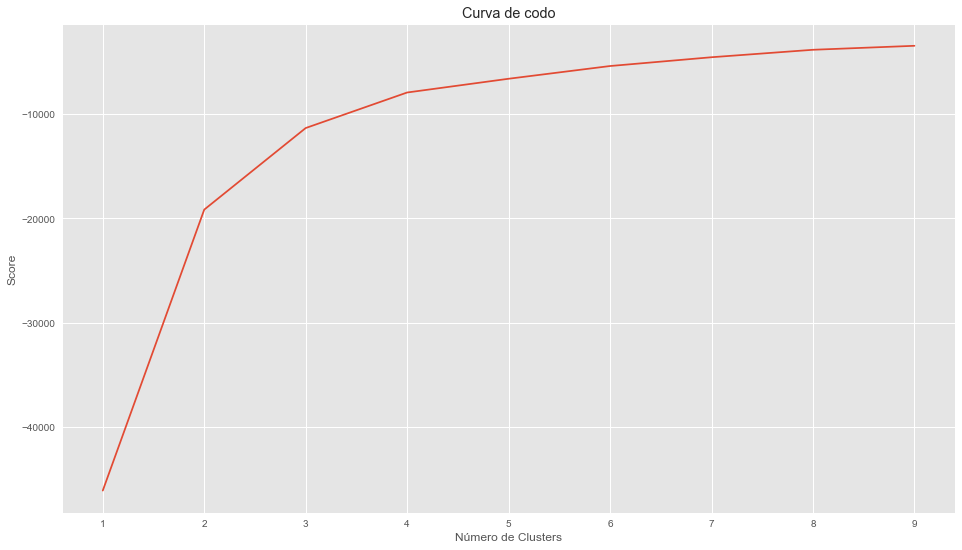

In [47]:
#Graficamos
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

<div style="background-color: #F4F6F6;">
El eje $x$ representa los distintos valores de $k$, y el eje $y$ el error cuadrático.
    
    Se puede observar que el codo de la curva se encuentra entre los valores 3 y 4, es decir, a partir de ese valor que empieza a estabilizarse la curva.
    
Para mejorar la elección de `k` vamos a utilizar un nuevo rango más pequeño y visualizamos la curva.
    
</div>

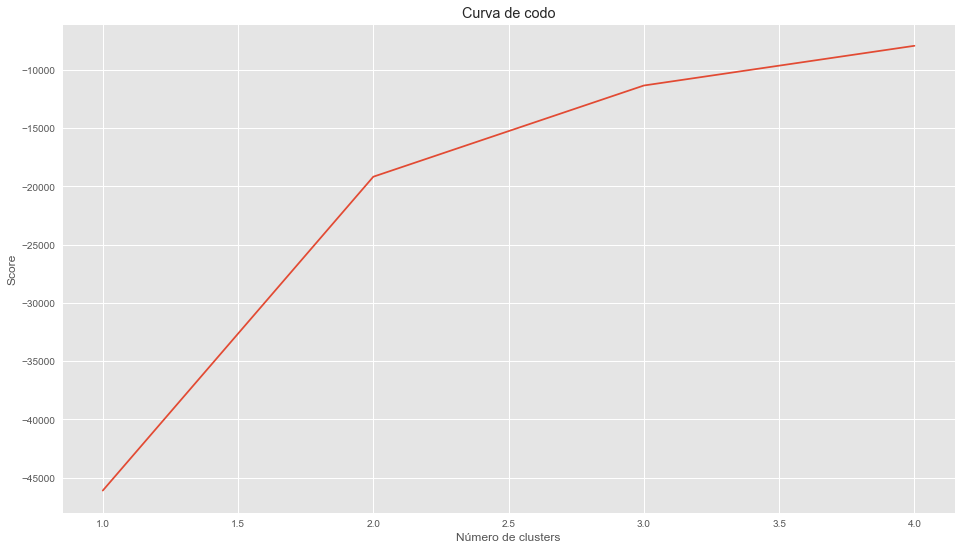

In [48]:
#Nuevo rango
Nc = range(1, 5)
#Hacemos uso de la libreria
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(dataF).score(dataF) for i in range(len(kmeans))]

#Graficamos
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.title('Curva de codo')
plt.show()

Como era de esperarse, el valor presenta su primer codo en 2 y empieza a estabilizarse en 3. Para ser más precisos en nuestra elección, considerando que la gráfica del codo puede resultar muy arbitraria, vamos a utilizar la técnica de la silueta que nos proporciona una puntuación y un número de k más exacto.

In [49]:
# Buscamos el número de clusters con  el método Silhouette
limit = int((dataF.shape[0]//2)**0.5)
  
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataF)
    pred = model.predict(dataF)
    score = silhouette_score(dataF, pred)
    print('Valor de silhouette para k = {}: {:<.3f}'.format(k, score))

Valor de silhouette para k = 2: 0.643
Valor de silhouette para k = 3: 0.541
Valor de silhouette para k = 4: 0.406
Valor de silhouette para k = 5: 0.373
Valor de silhouette para k = 6: 0.374
Valor de silhouette para k = 7: 0.376
Valor de silhouette para k = 8: 0.380
Valor de silhouette para k = 9: 0.355
Valor de silhouette para k = 10: 0.351


De acuerdo a los datos anteriores el valor de K es más alto en 2 y le sigue 3. Para visualizar estos datos vamos a graficar el método Silhouette con 2, 3 y 4 clusters.

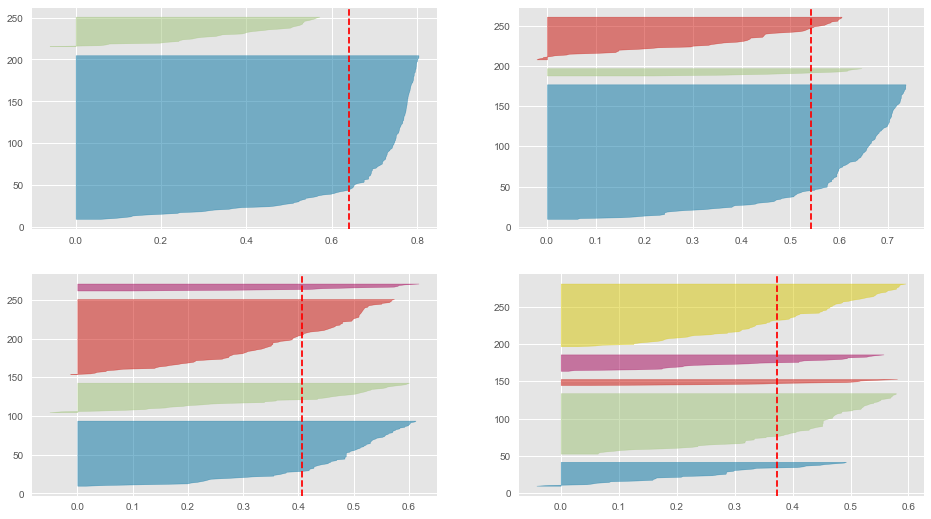

In [50]:
# Grafica Silhouette con 2, 3 y 4 clusters
fig, ax = plt.subplots(2,2)
for i in [2, 3, 4,5]:
    cont = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(cont, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataF)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> Kmeans con las variables objetivo
</div>

Observando la última gráfica, con `k=2` los datos se agrupan mayormente hacia uno de ellos, con `k=3` el tercer grupo ya abarca datos del cluster mayoritario y será entonces considerado para entrenar nuestro modelo. Con la función `KMeans` y aplicamos a nuestros datos con la función `fit`

In [51]:
#guardamos la data inicial
data_origen=dataF.copy()
#Con k=3
ModeloKmeans = KMeans(n_clusters=3, max_iter=100).fit(dataF)


#### Agregamos la clasificación a los datos originales

In [89]:
#Creamos la nueva variable y agregamos
dataF['kMeans_cluster']=ModeloKmeans.labels_
#Visualizamos
dataF.head(10)

,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,kMeans_cluster
0,1,1,0.00,0.00,0,0
1,7,3,4.88,4.88,0,0
2,13,6,7.21,7.21,1,0
3,8,3,5.60,5.60,0,0
4,29,15,6.18,6.18,0,1
5,27,12,5.40,5.40,2,1
6,19,2,8.06,8.06,4,1
7,16,2,7.89,7.89,3,0
8,25,16,8.61,8.61,0,1
9,15,9,5.83,5.83,0,0


In [53]:
#Creamos los centroides
centroids = ModeloKmeans.cluster_centers_

#Visualizamos los centros
centroids

array([[ 8.77710843,  3.78313253,  5.17746988,  5.24783133,  0.07228916],
       [24.75      , 11.25      ,  6.76589286,  6.80589286,  1.19642857],
       [50.4       , 34.5       ,  6.557     ,  6.651     ,  1.        ]])

Grafiquemos ahora el modelo en base a dos primeras variables: Intentos totales y la nota media

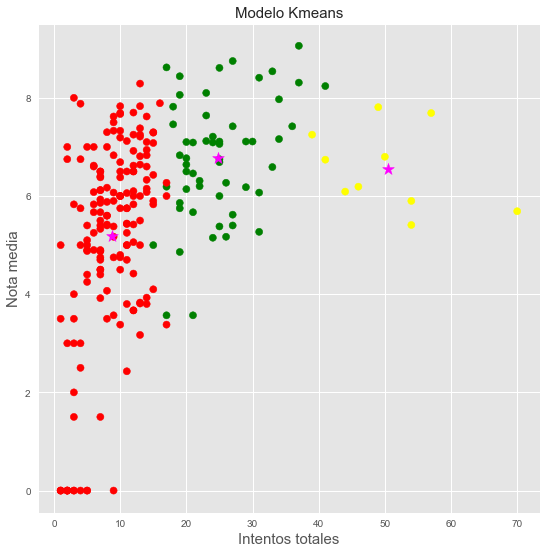

In [54]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Nota media', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.nota_media,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 2], marker='*', c='fuchsia', s=150)

plt.show()

Intentos totales y la nota media sin ceros

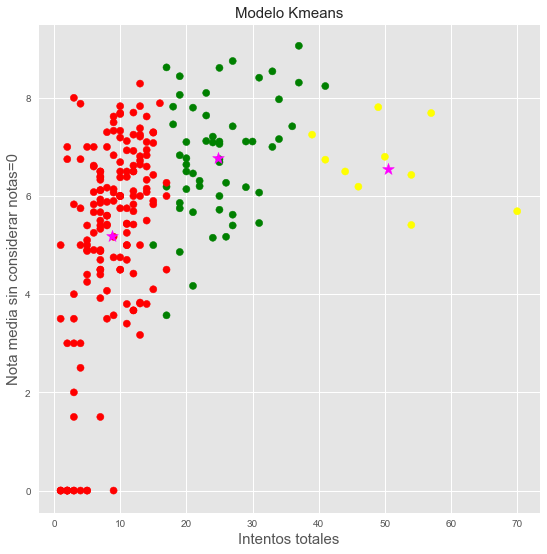

In [55]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Nota media sin considerar notas=0', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.nota_media_,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 2], marker='*', c='fuchsia', s=150)

plt.show()

Grafiquemos ahora el modelo con las variables: Intentos totales y la número de 10

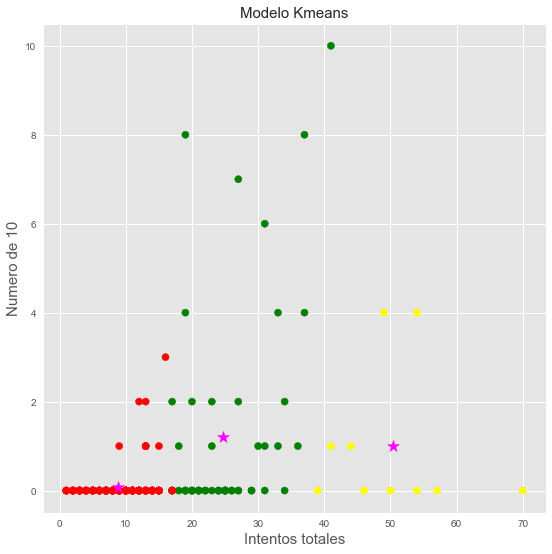

In [56]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Numero de 10', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.n_diez,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 4], marker='*', c='fuchsia', s=150)

plt.show()

Grafiquemos ahora el modelo con las variables: Intentos totales e intentos incompletos

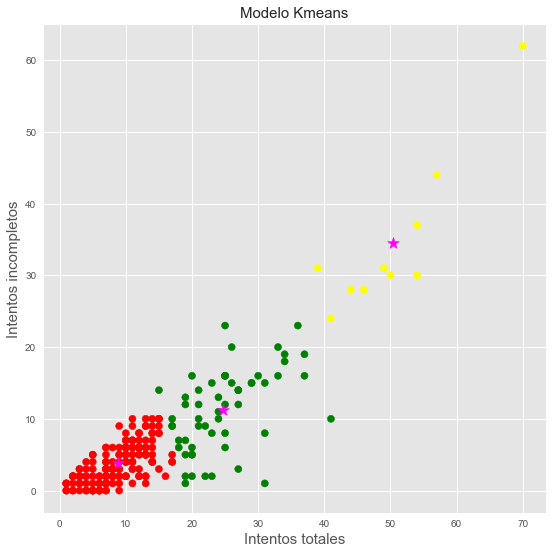

In [57]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Intentos totales', fontsize=15)
ax.set_ylabel('Intentos incompletos', fontsize=15)
ax.set_title('Modelo Kmeans', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataF.intentos_tot, y=dataF.intentos_incom,
           c=color[dataF.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='fuchsia', s=150)

plt.show()

Una vez realizado este análisis. Para poder abarcar todas las variables en el gráfico y ver los resultados de nuestro modelo, aplicaremos un PCA al conjunto de datos y graficamos sobre el resultado.

### Gráfica en base a componentes principales PCA

### Normalización de los datos.

Este paso es importante porque el algoritmo PCA se basa en la varianza de cada característica.

In [58]:
min_max_scaler = preprocessing.MinMaxScaler() 

# Escalamos los datos iniciales y se normalizan
dataFNor= min_max_scaler.fit_transform(data_origen) 

dataFNor #Datos normalizados

array([[0.        , 0.01612903, 0.        , 0.        , 0.        ],
       [0.08695652, 0.0483871 , 0.53863135, 0.53863135, 0.        ],
       [0.17391304, 0.09677419, 0.79580574, 0.79580574, 0.1       ],
       ...,
       [0.08695652, 0.03225806, 0.5187638 , 0.5187638 , 0.        ],
       [0.        , 0.        , 0.55187638, 0.55187638, 0.        ],
       [0.07246377, 0.03225806, 0.73068433, 0.73068433, 0.        ]])

Para el cálculo optimo de componentes vamos a evaluar la proporción de varianza explicada acumulada.

Eigenvectors 
[0.10436245 0.03293175 0.01460282 0.00151738 0.00036228]

Eigenvalues 
[[ 0.31325053  0.69550014  0.06332535  0.64061972 -0.06123683]
 [ 0.16729737  0.58952231  0.26461291 -0.74178348  0.06490242]
 [ 0.6500796  -0.27047138  0.08440689 -0.09930319 -0.69803732]
 [ 0.64646989 -0.26334877  0.08569346  0.0292249   0.71030039]
 [ 0.18264419  0.16197429 -0.95472615 -0.16925849  0.01596805]]


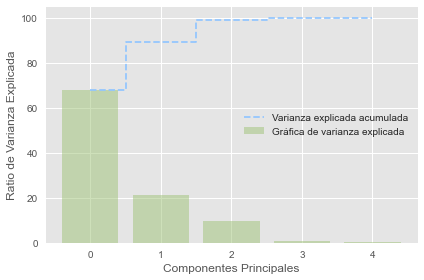

In [59]:
#Calculamos los autovalores y autovectores de los datos normalizados
mat = np.cov(dataFNor.T)
eig_v, eig_vec = np.linalg.eig(mat)

print('Eigenvectors \n%s' %eig_v)
print('\nEigenvalues \n%s' %eig_vec)

# A partir de los autovalores, calculamos la varianza explicada
valores = sum(eig_v)
varExpl = [(i / valores)*100 for i in sorted(eig_v, reverse=True)]
cum = np.cumsum(varExpl)
cum
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))
        
    plt.bar(range(5), varExpl, alpha=0.5, align='center', label='Gráfica de varianza explicada', color='g')
    plt.step(range(5), cum, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()


Instanciamos objeto PCA a 2 componentes considerando una gráfica en 2 dimensiones y aplicamos a nuestros datos normalizados.

In [60]:
pca=PCA(n_components=2) 
pca_notas=pca.fit_transform(dataFNor) # Obtenemos los componentes principales y entrenamos el modelo

#Mostramos los resultados de los dos componentes
pca_results=pd.DataFrame(pca_notas, columns=['Componente1', 'Componente2'])
print(pca_results)

     Componente1  Componente2
0       0.892789     0.135275
1       0.161791    -0.072763
2      -0.225247    -0.104847
3       0.054214    -0.105106
4      -0.156505     0.186495
..           ...          ...
227     0.245739     0.102877
228     0.011446    -0.112095
229     0.190249    -0.071665
230     0.179952    -0.168837
231    -0.079977    -0.194872

[232 rows x 2 columns]


In [61]:
#obtenemos la varianza explicada
expl = pca.explained_variance_ratio_
print(expl)
print('Suma:',round(sum(expl[0:5]),2))

[0.67866239 0.2141531 ]
Suma: 0.89


Ahora, concateno los componentes obtenidos con el resulado del modelo kmeans obtenido previamente

In [62]:
dataScoreF=pd.concat([pca_results, dataF[['kMeans_cluster']]], axis=1)
#visualizamos
dataScoreF.head()

,Componente1,Componente2,kMeans_cluster
0,0.892789,0.135275,0
1,0.161791,-0.072763,0
2,-0.225247,-0.104847,0
3,0.054214,-0.105106,0
4,-0.156505,0.186495,1


<div style="background-color: #F4F6F6;">
Ahora, realizamos la predicción para obtener los labels de nuestro modelo y graficamos.  
</div>

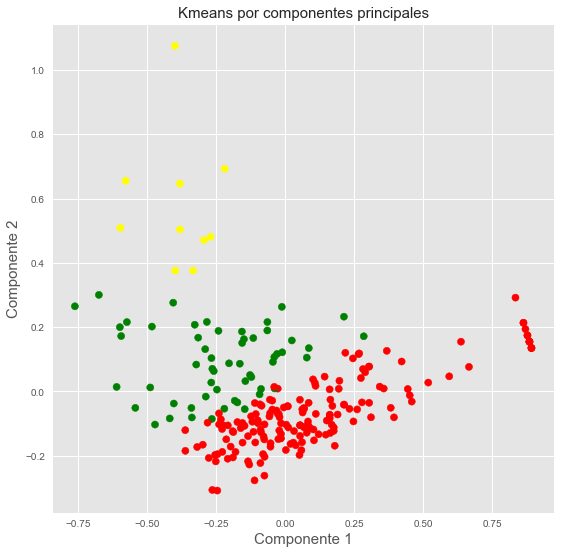

In [63]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=dataScoreF.Componente1, y=dataScoreF.Componente2,
           c=color[dataScoreF.kMeans_cluster], s=50)

plt.show()


- El color rojo corresponde al cluster 0
- El color verde corresponde al cluster 1
- El color amarillo corresponde al cluster 2

### Creación de kMeans con PCA

Al reducir la cantidad de características mediante el PCA, intentaremos mejorar el rendimiento de nuestro algoritmo. Además, al disminuir el número de características, también se reduce el ruido.

A continuación, crearemos un PCA con todos los componentes principales y así nos aseguramos de no perder datos, posteriormente modelamos el kMeans con los componentes obtenidos y finalmente graficamos el resultado.

In [64]:
pca=PCA(n_components=5) 
pca_notas=pca.fit_transform(dataFNor) # Obtenemos los componentes principales y entrenamos el modelo

#Mostramos los resultados de los dos componentes
pca_scores=pd.DataFrame(pca_notas, columns=['Componente1', 'Componente2', 'Componente3', 'Componente4', 'Componente5'])
print(pca_scores)

     Componente1  Componente2  Componente3  Componente4  Componente5
0       0.892789     0.135275     0.107046    -0.004196    -0.007512
1       0.161791    -0.072763     0.001382    -0.010165    -0.004138
2      -0.225247    -0.104847     0.034799    -0.025300    -0.001572
3       0.054214    -0.105106    -0.013054    -0.006450    -0.004051
4      -0.156505     0.186495    -0.094432     0.040464    -0.009341
..           ...          ...          ...          ...          ...
227     0.245739     0.102877     0.001237     0.073965     0.074858
228     0.011446    -0.112095    -0.022579    -0.020580    -0.002625
229     0.190249    -0.071665     0.009029     0.003191    -0.005428
230     0.179952    -0.168837     0.017439    -0.030907    -0.001791
231    -0.079977    -0.194872    -0.026101    -0.020944    -0.001942

[232 rows x 5 columns]


In [65]:
#obtenemos la varianza explicada
expl = pca.explained_variance_ratio_
print(expl)
print('Suma:',round(sum(expl[0:5]),2))

[0.67866239 0.2141531  0.09496124 0.00986741 0.00235587]
Suma: 1.0


Ahora, incorporaremos las puntuaciones obtenidas en el PCA en el algorimo K-means, para esto primero buscamos el número de k más adecuado con Silhouette.

In [66]:
# Buscamos el número de clusters con  el método Silhouette
limit = int((pca_scores.shape[0]//2)**0.5)
  
# using silhouette score method
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(pca_scores)
    pred = model.predict(pca_scores) #predecimos
    score = silhouette_score(pca_scores, pred, metric='euclidean')
    print('Valor de silhouette para k = {}: {:<.3f}'.format(k, score))

Valor de silhouette para k = 2: 0.453
Valor de silhouette para k = 3: 0.465
Valor de silhouette para k = 4: 0.394
Valor de silhouette para k = 5: 0.411
Valor de silhouette para k = 6: 0.394
Valor de silhouette para k = 7: 0.372
Valor de silhouette para k = 8: 0.345
Valor de silhouette para k = 9: 0.373
Valor de silhouette para k = 10: 0.339


In [67]:
#Con k=3
ModeloKmeansPCA = KMeans(n_clusters=3, max_iter=100).fit(pca_scores)
#Creamos la nueva variable y agregamos
pca_scores['kMeans_cluster']=ModeloKmeansPCA.labels_
#Visualizamos
pca_scores.head()

,Componente1,Componente2,Componente3,Componente4,Componente5,kMeans_cluster
0,0.892789,0.135275,0.107046,-0.004196,-0.007512,2
1,0.161791,-0.072763,0.001382,-0.010165,-0.004138,1
2,-0.225247,-0.104847,0.034799,-0.025300,-0.001572,1
3,0.054214,-0.105106,-0.013054,-0.006450,-0.004051,1
4,-0.156505,0.186495,-0.094432,0.040464,-0.009341,1


In [68]:
#Creamos los nuevos centroides
centroids = ModeloKmeansPCA.cluster_centers_

#Visualizamos los centros
centroids

array([[-4.36504520e-01,  2.81655350e-01,  7.58971673e-02,
        -1.04717386e-02, -6.52169635e-04],
       [-5.49411136e-02, -7.29773070e-02, -2.49544023e-02,
         2.39315995e-03, -5.85230333e-05],
       [ 5.25831499e-01,  8.91297218e-02,  4.49169589e-02,
        -2.04906077e-03,  6.92528068e-04]])

Graficamos nuestros clusters teniendo como ejes los componentes 1 y 2

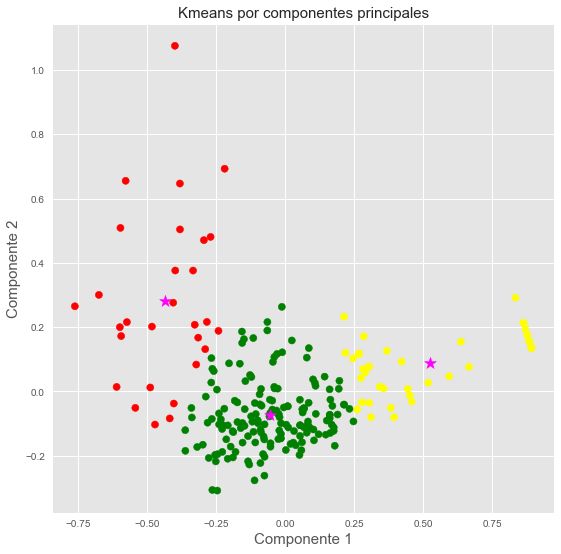

In [69]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=pca_scores.Componente1, y=pca_scores.Componente2,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='fuchsia', s=150)

plt.show()

- El color rojo corresponde al cluster 0
- El color verde corresponde al cluster 1
- El color amarillo corresponde al cluster 2

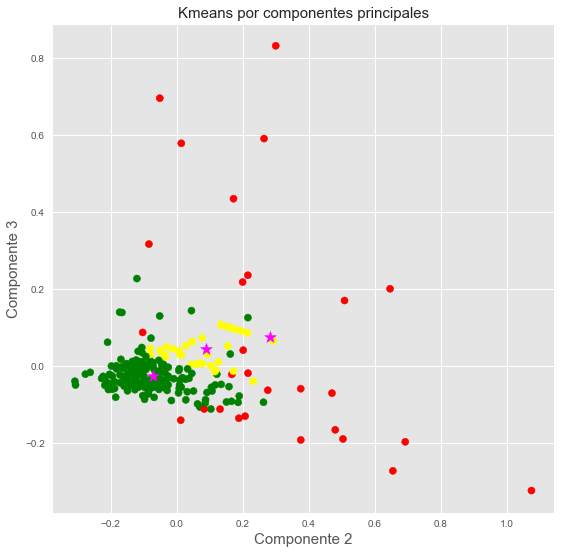

In [70]:
fig=plt.figure(figsize=(9,9))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 2', fontsize=15)
ax.set_ylabel('Componente 3', fontsize=15)
ax.set_title('Kmeans por componentes principales', fontsize=15)

color=np.array(['red','green','yellow'])
ax.scatter(x=pca_scores.Componente2, y=pca_scores.Componente3,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 1], centroids[:, 2], marker='*', c='fuchsia', s=150)

plt.show()

In [71]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Graficamos en tres dimensiones con los componentes 1 2 y 3

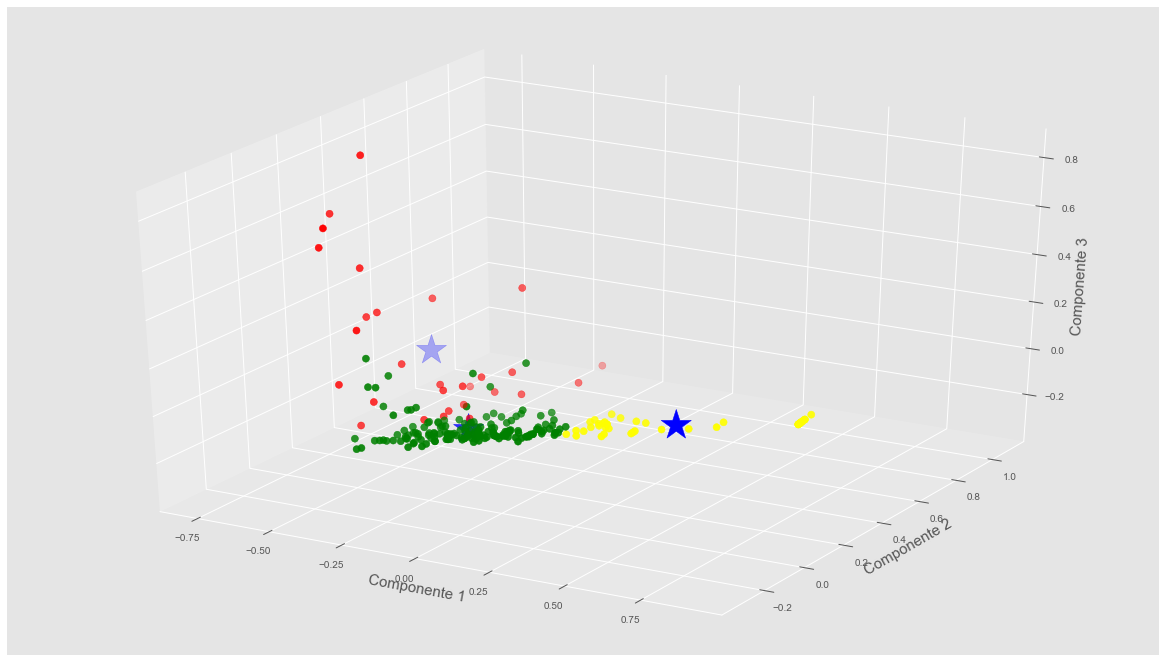

In [72]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_zlabel('Componente 3', fontsize=15)
color=np.array(['red','green','yellow'])
ax.scatter(pca_scores.Componente1, pca_scores.Componente2,  pca_scores.Componente3,
           c=color[pca_scores.kMeans_cluster], s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c="blue", s=1000)


#### Agregamos la nueva clasificación de k-Means con PCA a los datos originales

In [91]:
#Creamos la nueva variable y agregamos a nuestros datos originales que tienen el id del estudiante
data_score['kMeans_PCA_cluster']=ModeloKmeansPCA.labels_
#Visualizamos
data_score.head(10)

,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,kMeans_PCA_cluster
0,2032,1,1,0.00,0.00,0,2
1,2213,7,3,4.88,4.88,0,1
2,2215,13,6,7.21,7.21,1,1
3,2217,8,3,5.60,5.60,0,1
4,2218,29,15,6.18,6.18,0,1
5,2219,27,12,5.40,5.40,2,1
6,2220,19,2,8.06,8.06,4,0
7,2221,16,2,7.89,7.89,3,1
8,2222,25,16,8.61,8.61,0,0
9,2243,15,9,5.83,5.83,0,1


Con los datos y el resultado del cluster vamos agregar una columna adicional que corresponde a la fecha del examen, esto para realizar los análisis de los clusters. 

In [74]:
#Leer datos limpios generados en la sección de preprocesamiento que contiene los campos iniciales.
data_cl = pd.read_csv('../conjunto_datos/_data.csv', sep=';')
data_cl.head(10)

,Id,Score,Date
0,3175,8.5,2020-03-30 18:35:15+02
1,3209,7.5,2020-03-30 17:16:20+02
2,3229,8.5,2020-03-30 11:23:42+02
3,3229,No terminado,2020-03-30 10:48:41+02
4,3229,No terminado,2020-03-30 10:47:22+02
5,3229,No terminado,2020-03-30 10:45:33+02
6,3250,No terminado,2020-03-30 00:18:22+02
7,3203,7.5,2020-03-29 23:46:41+02
8,3190,7.5,2020-03-29 23:08:47+02
9,3190,No terminado,2020-03-29 22:46:08+02


In [75]:
#Eliminar la fecha y mantener unicamente el año de la columna Date

data_cl["anioE"]=data_cl['Date'].str.split('-', expand=False)
data_cl["anioE"]=data_cl['Date'].str.split('-', expand=True)
data_cl= data_cl.drop(['Score','Date'], axis=1)
data_cl

,Id,anioE
0,3175,2020
1,3209,2020
2,3229,2020
3,3229,2020
4,3229,2020
...,...,...
3353,2220,2018
3354,2213,2018
3355,2222,2018
3356,2,2018


In [76]:
#creamos una copia
data_f=data_cl.copy()

#Agrupar y hacer un merge con los datos que contienen el resultados del cluster por el id del estudiante
df = data_score.merge (data_f.groupby ('Id') ['anioE']. apply (lambda x: x.reset_index (drop = True)). unstack (). reset_index ()).rename(columns={'kMeans_PCA_cluster':'cluster'})
data_score_f=df.iloc[:, [0,1,2,3,4,5,6,7]]
data_score_f.head(20)


,Id,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez,cluster,0
0,2032,1,1,0.00,0.00,0,2,2018
1,2213,7,3,4.88,4.88,0,1,2018
2,2215,13,6,7.21,7.21,1,1,2018
3,2217,8,3,5.60,5.60,0,1,2018
4,2218,29,15,6.18,6.18,0,1,2018
5,2219,27,12,5.40,5.40,2,1,2018
6,2220,19,2,8.06,8.06,4,0,2018
7,2221,16,2,7.89,7.89,3,1,2018
8,2222,25,16,8.61,8.61,0,0,2018
9,2243,15,9,5.83,5.83,0,1,2018


Grabamos el set de datos clusterizados

In [77]:
data_score_f.to_csv('data_score_cluster2.csv',  sep=';', index=False)

## Análisis y descripción de los clusters obtenidos.

Rango de valor de silueta estará comprendido entre [-1, 1] -

 * Si el valor de la silueta está cerca de 1, la muestra está bien agrupada y asignada a un grupo muy apropiado.
 * Si el valor de la silueta está cerca de 0, la muestra podría asignarse a otro grupo más cercano y la muestra se encuentra igualmente lejos de ambos grupos. Eso significa que indica clústeres superpuestos.
 * Si el valor de silueta está cerca de –1, la muestra está mal clasificada y simplemente se coloca en algún lugar entre los grupos.

**De acuerdo al análisis inicial nuestro modelo tiene un valor de 0.465 con k=3**

In [78]:
#Obtenemos la media de la variable intentos_totales 
intentosT_c = pd.pivot_table(
      data_score_f, 
      index=['cluster'], 
      values=['intentos_tot'], 
      aggfunc={'intentos_tot':'mean'}
)
intentosT_c

,intentos_tot
cluster,
0,36.586207
1,12.327160
2,7.048780


In [79]:
#Obtenemos la media de la variable intentos_incompletos
intentosI_c = pd.pivot_table(
      data_score_f, 
      index=['cluster'], 
      values=['intentos_incom'], 
      aggfunc={'intentos_incom':'mean'}
)
intentosI_c

,intentos_incom
cluster,
0,20.965517
1,5.111111
2,4.073171


In [80]:
#Obtenemos la media de la variable nota_media
notaM_c = pd.pivot_table(
      data_score_f, 
      index=['cluster'], 
      values=['nota_media'], 
      aggfunc={'nota_media':'mean'}
)
notaM_c

,nota_media
cluster,
0,7.456552
1,6.140062
2,2.268049


In [81]:
#Obtenemos la media de la variable nota_media sin contar los 0
notaMs_c = pd.pivot_table(
      data_score_f, 
      index=['cluster'], 
      values=['nota_media_'], 
      aggfunc={'nota_media_':'mean'}
)
notaMs_c

,nota_media_
cluster,
0,7.503103
1,6.199938
2,2.360976


In [82]:
#Obtenemos la media de la variable n_diez 
notaD_c = pd.pivot_table(
      data_score_f, 
      index=['cluster'], 
      values=['n_diez'], 
      aggfunc={'n_diez':'mean'}
)
notaD_c

,n_diez
cluster,
0,2.379310
1,0.123457
2,0.000000


Unimos todos los datos

In [83]:
data_c1 = pd.merge(intentosT_c, intentosI_c, on='cluster',  how='left')
data_c2 = pd.merge(data_c1, notaM_c, on='cluster',  how='left')
data_c3 = pd.merge(data_c2, notaMs_c, on='cluster',  how='left')
data_cluster = pd.merge(data_c3, notaD_c, on='cluster',  how='left')

#Eliminamos los indices de nuestro conjunto de datos
data_cluster=data_cluster.reset_index()

#Mostramos
data_cluster

,cluster,intentos_tot,intentos_incom,nota_media,nota_media_,n_diez
0,0,36.586207,20.965517,7.456552,7.503103,2.379310
1,1,12.327160,5.111111,6.140062,6.199938,0.123457
2,2,7.048780,4.073171,2.268049,2.360976,0.000000


In [84]:
data_cluster.to_csv('clusters_media.csv',  sep=';', index=False)

<!--Footer-->
 <div style="background: #333333;padding: 35px 0px;margin-top: 25px;">
    <div class="row">
     <div class="col-sm-12">
        <img src="http://materials.cv.uoc.edu/cdocent/common/img/logo-uoc-bottom.png" alt="Logo UOC" class="img-responsive" style="margin: 0 auto; display: block;">
    </div>
</div>
</div>
<!--/Footer-->